# Part I - (Dataset Exploration Titanic)
## by (Rauf Garavaliyev)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [59]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [60]:
df = pd.read_csv('titanic.csv')

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [63]:
df.shape

(891, 12)

In [64]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
df.isnull().sum()
# we saw that in the column age, cabin and embarked there are missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
df.Cabin = df.Cabin.fillna("Lost")
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [67]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,Lost,S
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,Lost,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,Lost,S
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,Lost,Q
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,Lost,S


In [68]:
df.duplicated().sum()

0

In [69]:
df = df.dropna() 
df = df.drop(['Ticket'], axis=1)

In [70]:
df.shape

(712, 11)

### What is the structure of your dataset?

> There are 12 columns and maximum 891 rows.

### What is/are the main feature(s) of interest in your dataset?

> I will investigate the correlation between survived, age and gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Age and gender features will help me to get analysis.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [71]:
def chart_labels(x_label,y_label,title):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

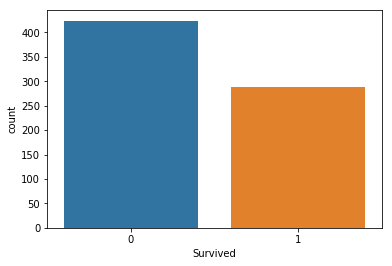

In [72]:
sb.countplot(data=df, x='Survived');

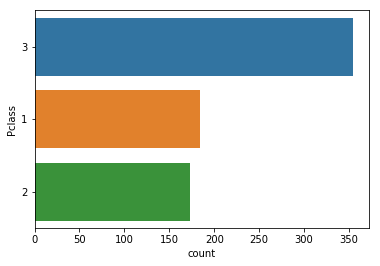

In [73]:
type_order = df['Pclass'].value_counts().index
sb.countplot(data=df, y='Pclass', order=type_order)

(array([  54.,   46.,  177.,  169.,  117.,   70.,   45.,   23.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

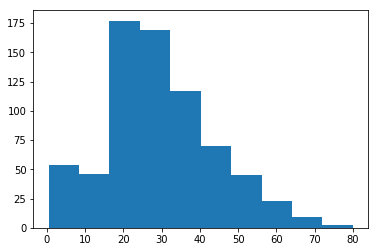

In [74]:
plt.hist(data = df, x = 'Age')

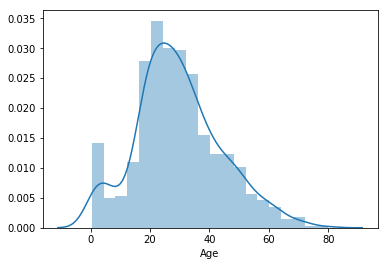

In [75]:
sb.distplot(df['Age'])

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We can see that from 1 plot, many of travellers were died, And most ages of travellers are between 20-40 ages.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> |For analysis We are operate data cleaning and find missing values, some of them we filled however we dropped also some data for productive analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0,0.5,'Survived')

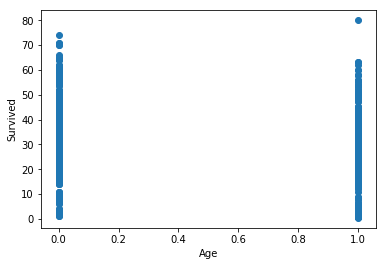

In [76]:
# Scatter plot
plt.scatter(data =df, y = 'Age', x = 'Survived');
plt.xlabel('Age')
plt.ylabel('Survived')

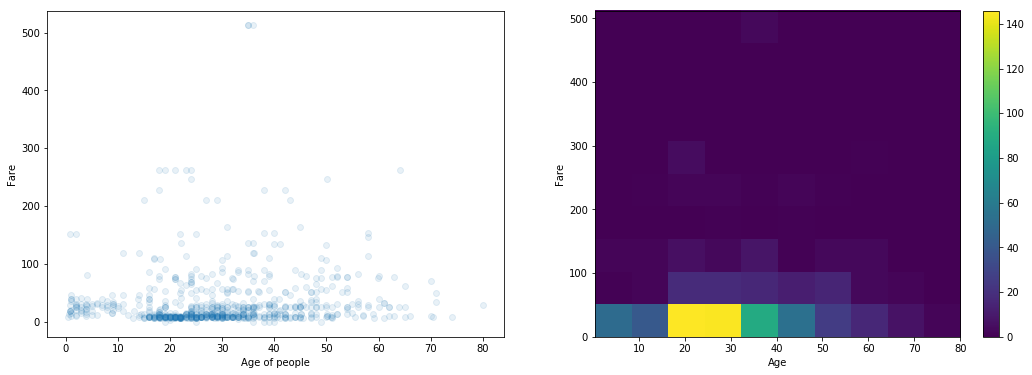

In [77]:


plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'Age', y = 'Fare', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Age of people')
plt.ylabel('Fare');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = df, x = 'Age', y = 'Fare')
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Fare');

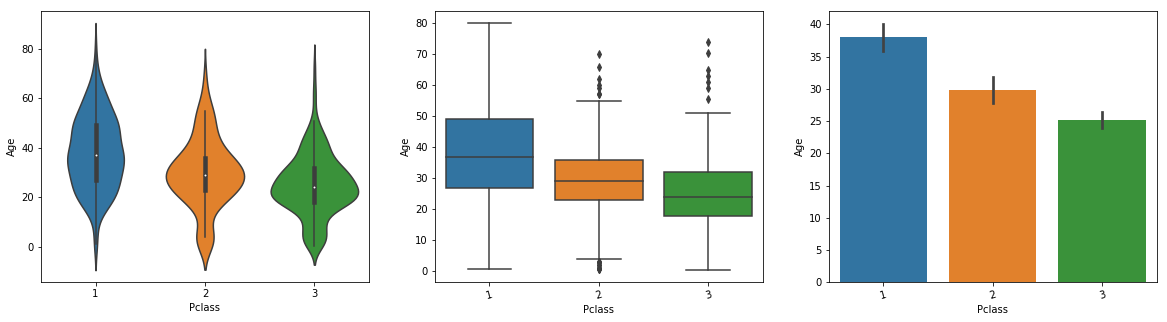

In [78]:


plt.figure(figsize = [20, 5])

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=df, x='Pclass', y='Age') # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=df, x='Pclass', y='Age')
plt.xticks(rotation = 15);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=df, x='Pclass', y='Age')
plt.xticks(rotation = 15);

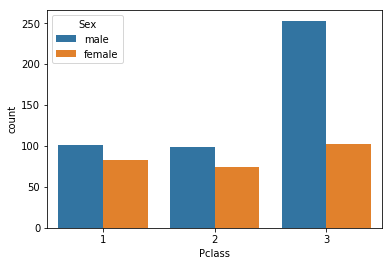

In [79]:
sb.countplot(data = df, x = 'Pclass', hue = 'Sex')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We can see that people who are between 20-40 are survived more than others. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observe that young people and males prefered mostly  to 3rd class. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

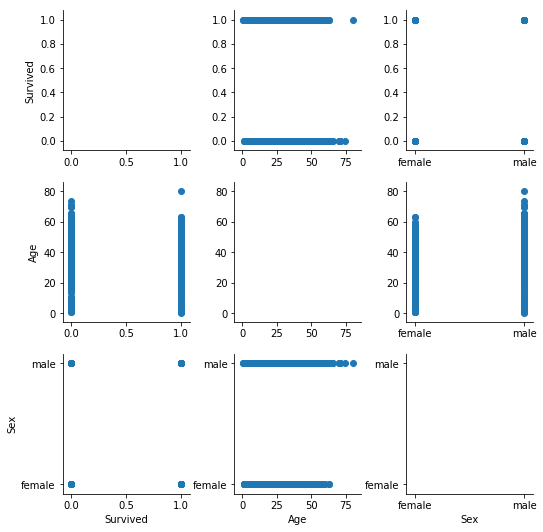

In [80]:

g = sb.PairGrid(data = df, vars = ['Survived', 'Age', 'Sex', ])
g.map_offdiag(plt.scatter)

In [ ]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    diamonds[var] = diamonds[var].astype(ordered_var)

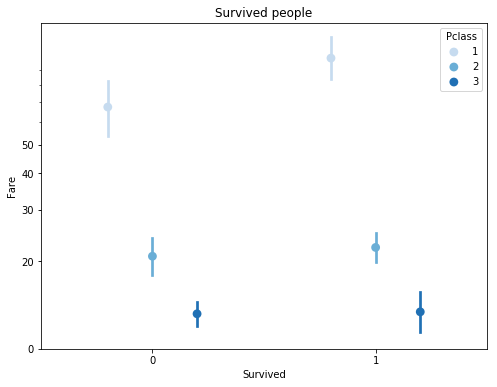

In [91]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, y = 'Fare', x = 'Survived', hue = 'Pclass',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Survived people')
plt.ylabel('Fare')
plt.yscale('log')
plt.yticks([10, 20, 30, 40, 50 ], ['0', '20', '30', '40','50'])
ax.set_yticklabels([],minor = True)
plt.show();

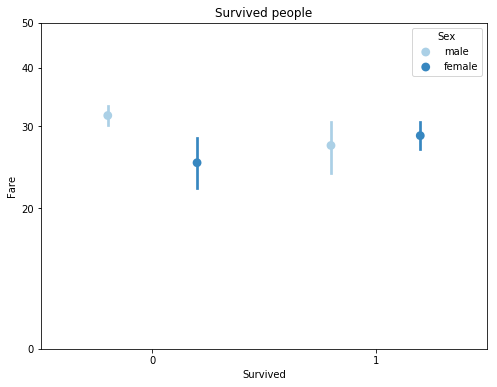

In [98]:
ig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, y = 'Age', x = 'Survived', hue = 'Sex',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Survived people')
plt.ylabel('Age')
plt.yscale('log')
plt.yticks([10, 20, 30, 40, 50 ], ['0', '20', '30', '40','50'])
ax.set_yticklabels([],minor = True)
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We can see all information before we talked about correlation between survived, age and gender. More male were survived than female and people who were 20-40 ages also survived more than others.

### Were there any interesting or surprising interactions between features?

> We can see that people who are younger are males. 

## Conclusions
> There are 12 columns and maximum 891 rows. I will investigate the correlation between survived, age and gender. Age and gender features will help me to get an analysis. We can see that from 1 plot, many of travellers died, And most ages of travellers are between 20-40 ages. |For analysis We are operate data cleaning and find missing values, some of them we filled however we dropped also some data for productive analysis.We can see that people who are between 20-40 are survived more than others.We can see all information before we talked about correlation between survived, age and gender. More male were survived than female and people who were 20-40 ages also survived more than others.




> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

